Graphs and visualization
========================

A lot of the joy of digital humanities comes in handling our material in new ways, so that we see things we wouldn't have seen before. Quite literally.

Some of the most useful tools for DH work are graphing tools! Today we will look at the basics of what a graph is and how you might build one, both manually and programmatically, and then name the tools to look into if you want to know more.

Tools you'll need
-----------------

* Graphviz: http://www.graphviz.org
* The graphviz and sphinx modules for Python


So what can you do with graphs?

<img src="https://i.embed.ly/1/display/resize?key=1e6a1a1efdb011df84894040444cdc60&url=http%3A%2F%2Fpbs.twimg.com%2Fmedia%2FBslvzfjIcAAW6Ro.png">

You can visualize relationships, networks, you name it.

http://ckcc.huygens.knaw.nl/epistolarium/#


The DOT graph language
----------------------

It's pretty easy to start building a graph, if you have the tools and a plain text editor. First you have to decide whether you want a *directed* or an *undirected* graph. If all the relationships you want to chart are symmetric and two-way (e.g. "these words appear together" or "these people corresponded", then it can be undirected. But if there is any asymmetry (e.g. in social networks - just because Tom is friends with Jane doesn't mean that Jane is friends with Tom!) then you want a directed graph.

If you want to make a directed graph, it looks like this:

    digraph "My graph" {
        [... graph data goes here ...]
    }
    
and if you want to make an undirected graph, it looks like this.

    graph "My graph" {
        [... graph data goes here ...]
    }
    
Let's say we want to make that little two-person social network. In graph terms, you have *nodes* and *edges*. The edges are the relationships, and the nodes are the things (people, places, dogs, cats, whatever) that are related. The easiest way to express that is like this:

    digraph "My graph" {
        Tom -> Jane
    }

which says "The node `Tom` is connected to the node `Jane`, in that direction." We plug that into Graphviz, and what do we get? Let's use a little iPython magic to find out.

We are going to use an extension called 'hierarchymagic', which gives us the special `%%dot` command. You can install the extension like this. <br>**You only have to do this once!**

You will get a warning that "install_ext" is deprecated; there isn't much we can do about this ourselves, so don't worry unduly about it.

Now anytime you want to use graphs in IPython, this is how you do it.

In [1]:
# This is how you get the %%dot and %dotstr command that we use below.
%load_ext hierarchymagic  

Then you do this every time you want to make a graph. The `-f svg` says that it should make an SVG image, which is what I recommend.

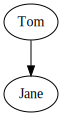

In [6]:
%%dot -f svg
digraph "My graph" {
    Tom -> Jane
}
# dot draws directed graphs


Now maybe Tom has a friend too:

    digraph "My graph" {
        Tom -> Jane
        Ben -> Tom
        Tom -> Ben
    }



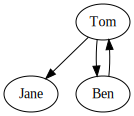

In [3]:
%%dot -f svg
digraph "My graph" {
    Tom -> Jane
    Ben -> Tom
    Tom -> Ben
}

...And so on. But what if we do want a nice symmetrical undirected graph? That is even simpler. Instead of `digraph` we say `graph`, and instead of describing the connections with `->` we use `--` instead. If we have a model like Facebook where friendship is always two-way, we can do this:

    graph "My graph" {
        Tom -- Jane
        Ben -- Tom
    }

Note that we don't need the third line (`Tom -- Ben`) because it is now the same as saying `Ben -- Tom`.

Since this is an undirected graph, we want it to be laid out a little differently (not just straight up-and-down.) For this we can specify a different program with this `-- -K` flag. The options are `dot` (the default), `neato`, `twopi`, `circo`, `fdp`, and `sfdp`; they all take different approaches and you are welcome to play around with each one.

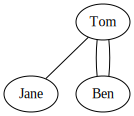

In [9]:
%%dot -f svg
graph "My graph" {
    Tom -- Jane
    Ben -- Tom
#    Tom -- Ben
}

# adding the line Tom -- Ben creates simply a double line between the nodes "Ben" and "Tom"

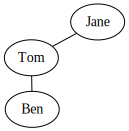

In [10]:
%%dot -f svg
graph "My graph" {
    layout=fdp
    Tom -- Jane
    Ben -- Tom
}

You can change the font, the shape of the nodes, the colors of the links, and so on by setting attributes in square brackets. Attributes can be set for the graph, for all nodes, for all edges, and for individual nodes and edges. All the different attribute options can be read about [here](http://www.graphviz.org/doc/info/attrs.html).

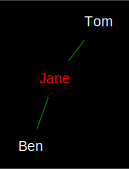

In [11]:
%%dot -f svg
graph "My pretty graph" {
    # attributes are placed in[] and are key:value pairs
    # you can set attributes on all nodes, all edges, or on individual nodes or edges
    graph [layout=neato, bgcolor=black]
    node [shape=plain, fontcolor=white, fontname=Helvetica]
    Jane [fontcolor=red]
    Tom -- Jane [color=green]
    Jane -- Ben [color=green]    
}

Of course, this would hardly be fun if we couldn't do it programmatically!

Building graphs with Graphviz + Python
--------------------------------------

Now we are going to make a few graphs, not by writing out dot, but by making a *graph object* that holds our nodes and edges. We do this with the `graphviz` module. 

In [13]:
import graphviz     # Use the Python graphviz library

We make a new directed graph with `graphviz.Digraph()`, and a new undirected graph with `graphviz.Graph()`.

In [14]:
my_graph = graphviz.Digraph()

Let's make a social network graph of five friends, all of whom like each other. But instead of typing out all those

    Anna -> Ben
    
sorts of lines, we will let the program do that for us.

In [15]:
# Our list of friends
all_friends = [ 'Jane', 'Ben', 'Tom', 'Anna', 'Charlotte' ]

# Make them all friends with each other.
# As long as there are at least two people left in the list of friends...
while len( all_friends ) > 1:
    this_friend = all_friends.pop() # Remove the last name from the list
    for friend in all_friends:      # Cycle through whoever is left and make them friends with each other
        my_graph.edge( this_friend, friend )  # I like you
        my_graph.edge( friend, this_friend )  # You like me

# Spit out the graph in its DOT format
# the source of a graph is always DOT format
print(my_graph.source)

digraph {
	Charlotte -> Jane
	Jane -> Charlotte
	Charlotte -> Ben
	Ben -> Charlotte
	Charlotte -> Tom
	Tom -> Charlotte
	Charlotte -> Anna
	Anna -> Charlotte
	Anna -> Jane
	Jane -> Anna
	Anna -> Ben
	Ben -> Anna
	Anna -> Tom
	Tom -> Anna
	Tom -> Jane
	Jane -> Tom
	Tom -> Ben
	Ben -> Tom
	Ben -> Jane
	Jane -> Ben
}


And here is a little iPython magic function so that we can actually make the graph display right here in the notebook. This means that, instead of copy-pasting what you see above into a new cell, you can just ask IPython to do the copy-pasting for you! 

Don't worry too much about understanding this (unless you want to!) but we will use it a little farther down. 

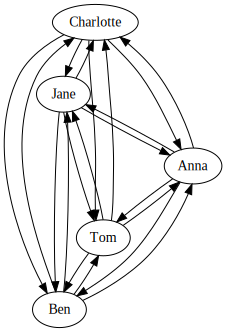

In [16]:
%dotstr -f svg
# dotstr assumes that the very next variable is a string
my_graph

Basic usage for the Graphviz python library
-------------------------------------------

So here is a short summary of what we did above that you will want to remember:

In [17]:
# import graphviz;

this_graph = graphviz.Digraph()    # start your directed graph
this_undirected = graphviz.Graph() # ...or your undirected graph

this_graph.edge( "me", "you" )   # Add a relationship between me and you
this_undirected.edge( "me", "you" )

print(this_graph.source)       # Print out the dot.
print(this_undirected.source)

digraph {
	me -> you
}
graph {
	me -- you
}


Labels and IDs
--------------

When you are making a graph, it is important that every node be unique - if you have two people named Tom, then the graph program will have no idea which Tom is friends with Anna. So how do you handle having two people named Tom, without resorting to last names or AHV numbers or something like that?

You use *attributes* in the graph, and specifically the *label* attribute. It looks something like this:

    graph G {
        Tom1 [ label="Tom" ]
        Tom2 [ label="Tom" ]
        Tom1 -- Anna
        Tom1 -- Tom2
    }

Before this, we only named our nodes when we needed them to define a relationship (an edge). But if we need to give any extra information about a node, such as a label, then we have to list it first, on its own line, with the extra information between the square brackets.

There are a whole lot of options for things you might want to define! Most of them have to do with how the graph should look, and we will look at them in a minute. For now, this is what we get for this graph:

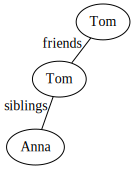

In [18]:
lg = graphviz.Graph()   # Make this one undirected
lg.graph_attr['layout'] = 'neato'
# in order to make the label an attribute, the node needs to be declared
lg.node( "Tom1", label="Tom" )
lg.node( "Tom2", label="Tom" )
# Anna node does not have to be declared because there's only one
# edges can have labels too
lg.edge( "Tom1", "Anna", label="siblings" )
lg.edge( "Tom1", "Tom2", label="friends" )

%dotstr -f svg
lg

Notice, in this, that Anna still popped into existence when we referred to her in a relationship. But in the real world, we will probably want to declare our nodes with (for example) student numbers as the unique identifier, and names for display in the graph.

Styling the graph
-----------------

We can also set attributes on a graph using Python. Imagine that we want a graph that displays the relationships between members of a family and where they go each day.

Here's how we can do that in python, and what we get.

In [20]:
copying_relations = [
  ("O", "a"),
  ("O", "b"),
  ("a", "Au318"),
  ("a", "Go325"),
  ("a", "Gr314"),
  ("a", "f"),
  ("a", "g"),
  ("b", "Au318"),
  ("b", "Ba96"),
  ("b", "Go325"),
  ("b", "Gr314"),
  ("b", "Sg524"),
  ("b", "c"),
  ("c", "An74"),
  ("c", "MuU151"),
  ("c", "d"),
  ("d", "Mu11475"),
  ("d", "e"),
  ("e", "Er16"),
  ("e", "Mu28315"),
  ("f", "Krems299"),
  ("f", "h"),
  ("g", "Mu22405"),
  ("g", "Wi3181"),
  ("h", "Kf133"),
  ("h", "Krems185"),
  ("Krems185", "b"),
  ("Krems299", "Mu22405")]

# Make a set of our witnesses so we can list them out with their attributes
witnesses = set()
for source, target in copying_relations:
    witnesses.add(source)
    witnesses.add(target)

# Make our stemma graph
stemma = graphviz.Digraph()
stemma.node_attr["fillcolor"] = "white"
stemma.node_attr["color"] = "white"
stemma.edge_attr['arrowhead'] = "none"

# Add our nodes
for witness in witnesses:
    if len(witness) == 1:  # It is a hypothetical / reconstructed witness
        stemma.node(witness, fontcolor="grey", fontsize="11")
#    else:
#        stemma.node(witness)

# Add our edges
for source, target in copying_relations:
    stemma.edge(source, target)

# Make the cell with the dot
# %dotstr -f svg
# stemma

# Make the cell outside Jupyter Notebook:
# take your DOT file:
print(stemma.source)
# paste it in a plain text editor 
# save it as .gv
# go to the commandline and transform your file into an svg
# >>> dot -Tsvg [namefile.gv] > [name.svg]

digraph {
	node [color=white fillcolor=white]
	edge [arrowhead=none]
	O [fontcolor=grey fontsize=11]
	h [fontcolor=grey fontsize=11]
	c [fontcolor=grey fontsize=11]
	a [fontcolor=grey fontsize=11]
	b [fontcolor=grey fontsize=11]
	g [fontcolor=grey fontsize=11]
	d [fontcolor=grey fontsize=11]
	e [fontcolor=grey fontsize=11]
	f [fontcolor=grey fontsize=11]
	O -> a
	O -> b
	a -> Au318
	a -> Go325
	a -> Gr314
	a -> f
	a -> g
	b -> Au318
	b -> Ba96
	b -> Go325
	b -> Gr314
	b -> Sg524
	b -> c
	c -> An74
	c -> MuU151
	c -> d
	d -> Mu11475
	d -> e
	e -> Er16
	e -> Mu28315
	f -> Krems299
	f -> h
	g -> Mu22405
	g -> Wi3181
	h -> Kf133
	h -> Krems185
	Krems185 -> b
	Krems299 -> Mu22405
}


In [ ]:
family_members = ["Tara", "Mike", "Sophie"]
places = ["work", "school"]

# Make the graph
family = graphviz.Digraph()
# Set some defaults
family.graph_attr = {"bgcolor": "black"}
family.node_attr = {'fontcolor': "red" }
family.edge_attr = {'fontcolor': "white", 'color': "white"}

# Add the family members
for member in family_members:
    family.node(member)
# Add the places they go
for place in places:
    family.node(place, shape="house", color="blue", fontcolor="white")

# Set up the relationships
family.edge( "Tara", "Sophie", label="is mother", color="green", fontcolor="green" )
family.edge( "Mike", "Sophie", label="is father", color="green", fontcolor="green" )
family.edge( "Tara", "work", label="goes to" )
family.edge( "Mike", "work", label="goes to" )
family.edge( "Sophie", "school", label="goes to" )

# Make the cell with the dot
%dotstr -f svg
family

All done! There are a huge number of styling attributes - ways to control line thickness, color, shape, graph direction, and so on. They are documented in eye-watering detail here:

http://www.graphviz.org/content/attrs

So now let's return to what we were doing with Zotero a few weeks ago...

In [ ]:
from pyzotero import zotero
import json

zotero_group = zotero.Zotero( 30, "group", 'SsbeUu6kJbK4w723P7GklmNb' )
our_items = zotero_group.top(limit=100)
for i in range(int(zotero_group.num_items() / 100)):
    our_items.extend(zotero_group.follow())
len(our_items)

So now we have all our items - let's see who the authors, editors, etc. are! We can start by looking at one of the records.

In [ ]:
our_items[3]

So we get their names, and we get the info of whether they are authors or editors or translators or what. Let's make a graph and see who publishes about digital humanities!

First, just to make sure we have the hang of this, let's list all the creators we find.

In [ ]:
for item in our_items:
    for creator in item['data']['creators']:
        print("%s %s was a(n) %s" % 
              ( creator['firstName'], 
               creator['lastName'], 
               creator['creatorType'] ))

Ooh huh, that's an ugly error. The `KeyError` means that we found a record that doesn't have a `firstName`. We could use a `try/except` block like we did above, but we could also just check whether each person has a first name before we try to list them. Let's see what's going on with these records that don't, by just printing out the whole structure when we encounter one. 

In [ ]:
for item in our_items:
    for creator in item['data']['creators']:
        if 'firstName' in creator:             ## NEW LINE
            print("%s %s was a(n) %s" % ( 
                    creator['firstName'], 
                    creator['lastName'], 
                    creator['creatorType'] ))
        else:                                  ## NEW LINE
            print(json.dumps(creator))         ## NEW LINE

So some of our creators just have a `name`, instead of having it subdivided into first and last. We can handle that easily enough.

In [ ]:
for item in our_items:
    for creator in item['data']['creators']:
        if 'firstName' in creator:
            print("%s %s was a(n) %s" % ( 
                    creator['firstName'], 
                    creator['lastName'], 
                    creator['creatorType'] ))
        else:
            print("%s was a(n) %s" % (          # NEW LINE
                    creator['name'],            # NEW LINE
                    creator['creatorType']))    # NEW LINE


But we still have an error - at least one record doesn't have any 'creators' field at all. What's going on with that? Let's look at the JSON.

In [ ]:
for item in our_items:
    if 'creators' not in item['data']:
        print(item['data'])


Sure enough, there is some form of record that doesn't have any creator information associated with it. Since we are interested in co-authorship, we can simply skip these, but we need to make sure that our code knows to do that. We will modify our code one more time, to make sure we can get through the list without error:


In [ ]:
for item in our_items:
    if 'creators' not in item['data']:        # NEW LINE
        continue                              # NEW LINE
    for creator in item['data']['creators']:
        if 'firstName' in creator:
            print("%s %s was a(n) %s" % ( 
                    creator['firstName'], 
                    creator['lastName'], 
                    creator['creatorType'] ))
        else:
            print("%s was a(n) %s" % (
                    creator['name'],
                    creator['creatorType']))

There we are! We can list our creators, which means we can graph them! We are going to use our good old graphviz Python library to create the graph. We will use an undirected graph, since there is no particular hierarchy in the collaborations we find here.

In [ ]:
author_graph = graphviz.Graph()

and we can put in the data.
Here we want to have an edge between two authors whenever they worked together on a publication, whether as author or editor or contributor or what have you. So for each publication, we will make a list of their names (using the code we wrote above), and then make graph edges between each pair of names in that list.

In [ ]:
for item in our_items:
    if( 'creators' not in item['data'] ):
       continue
    # First, make a list of all the collaborators for this item.
    item_collaborators = []
    for creator in item['data']['creators']:
        full_name = ''
        if( 'firstName' in creator ):
            full_name = creator['firstName'] + ' ' + creator['lastName']
        else:
            full_name = creator['name']
        item_collaborators.append( full_name )
    # Second, add each pair of collaborators to the graph as an edge.
    while( len( item_collaborators ) > 1 ):
        me = item_collaborators.pop()
        for you in item_collaborators:
            author_graph.edge( me, you )

So what did we get? Let's list it out.

In [ ]:
%dotstr -f svg
author_graph

We can also experiment with the other layout styles like this:

In [ ]:
author_graph.graph_attr = {"layout": "fdp"}

%dotstr -f svg
author_graph

What other sorts of optimisations can we do, and how would you do them? (e.g. double links? Names nearly the same? Excluding isolated pairs?)